# CH 19. 딥러닝 구현

6000
1000
6000
1000
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 6000 samples, validate on 1000 samples
Epoch 1/5
6000/6000 [==============================] - 0s 81us/step - loss: 2.3722 - acc: 0.1427 - val_loss: 2.0783 - val_acc: 0.4220
Epoch 2/5
6000/6000 [==============================] - 0s 14us/step - loss: 2.1006 - acc: 0.2620 - val_loss: 1.8925 - val_acc: 0.6480
Epoch 3/5
6000/6000 [==============================] - 0s 15us/step - loss: 1.8986 - acc: 0.3665 - val_loss: 1.7252 - val_acc: 0.6910
Epoch 4/5
6000/6000 [==============================] - 0s 17us/step - loss: 1.7337 - acc: 0.4525 - val_loss: 1.5638 - val_acc: 0.7140
Epoch 5/5
6000/6000 [==============================] - 0s 17us/step - loss: 1.5795 - acc: 0.5218 - val_loss: 1.4239 - val_acc: 0.7290


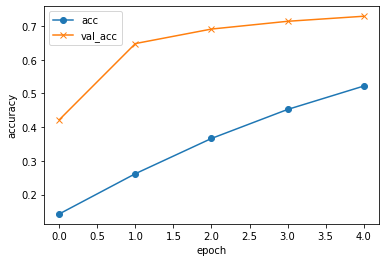

In [10]:
##

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical
%matplotlib inline


(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

#
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))

model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

# epochs : 5
history = model.fit(X_train, y_train, batch_size=500, epochs=5, verbose=1, validation_data=(X_test, y_test))

# acc, val_acc
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()


In [11]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# ---------------------------
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# ---------------------------


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


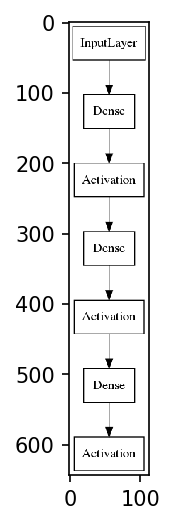

In [12]:
#--import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#os.environ["PATH"] += os.pathsep + '/home/max/DeepLearningBook/'

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
# 입력 유닛 수 : 784, 첫번째 전결합층의 출력 유닛 수 : 256
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))

# 두번째 전결합층의 출력 유닛 수 : 128 ?
model.add(Dense(128))
model.add(Activation("relu"))

# 세번째 전결합층(출력층)의 출력 유닛 수 : 10
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# 모델 구조를 출력
plot_model(model, "model125.png", show_layer_names=False)
# 모델 구조를 시각화
image = plt.imread("model125.png")
plt.figure(dpi=150)
plt.imshow(image)
plt.show()

### 모델 학습

Epoch 1/3
6000/6000 [==============================] - 1s 126us/step - loss: 2.0906 - acc: 0.4183
Epoch 2/3
6000/6000 [==============================] - 0s 70us/step - loss: 1.6813 - acc: 0.6835
Epoch 3/3
6000/6000 [==============================] - 0s 69us/step - loss: 1.3676 - acc: 0.7700


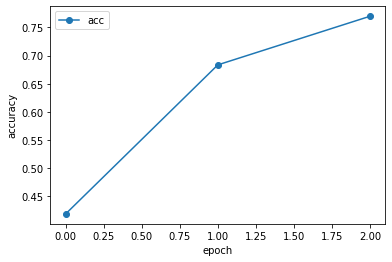

In [13]:
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras import optimizers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
#
history = model.fit(X_train, y_train, verbose=1, epochs=3)
# ---------------------------
# acc, val_acc의 플롯
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

### 모델 평가

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train)

#--
score = model.evaluate(X_test, y_test, verbose=1)
#
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Epoch 1/1
1000/1000 [==============================] - 0s 125us/step
evaluate loss: 1.8889134216308594
evaluate acc: 0.545


### 모델에 의한 분류

Epoch 1/1
6000/6000 [==============================] - 1s 137us/step - loss: 2.0661 - acc: 0.4458
evaluate loss: 1.854134171485901
evaluate acc: 0.583


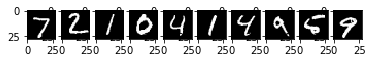

[7 6 1 0 4 1 4 4 0 4]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

# 테스트 데이터 : 10
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)), "gray")
plt.show()

# X_test의 첫 10장의 예측된 라벨을 표시
# ---------------------------
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)
# ---------------------------

### 연습 문제

Epoch 1/1
10000/10000 [==============================] - 1s 107us/step - loss: 1.9867 - acc: 0.4853
evaluate loss: 1.6966781930923462
evaluate acc: 0.663


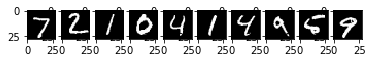

[7 6 1 0 4 1 9 9 5 9]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
%matplotlib inline

# 데이터 세트 load
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:10000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:10000]
y_test = to_categorical(y_test)[:1000]

# 1. 모델 생성
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# 2. 학습
model.fit(X_train, y_train, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)), "gray")
plt.show()

# 3. 모델 분류
pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)